In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.model_selection import cross_val_score

from tradPointOut import rankToPoints2017

sns.set_style("whitegrid")

In [4]:
rawDf = pd.read_csv("data/tier7b.csv")
df = rawDf.copy()
df.isRelay = df.isRelay.astype(int)

In [5]:
df2018 = df.loc[df["year"] == 2018]
testSet = df2018.sample(frac = 0.7, random_state = 33)
testY = testSet.pop("points")
testX = testSet.copy()

trainSet = df[~df.index.isin(testSet.index)]
trainY = trainSet.pop("points")
trainX = trainSet.copy()

y2018 = df2018["points"]
x2018 = df2018[["divsSpeed", "isRelay", "divsTimePctOfMean",  "clipped_divsRank"]] 
#order of columns is important!

trainX = trainX[["divsSpeed", "isRelay", "divsTimePctOfMean",  "clipped_divsRank"]] 
testX = testX[["divsSpeed", "isRelay", "divsTimePctOfMean",  "clipped_divsRank"]] 

In [6]:
from sklearn.svm import SVR

svr = SVR(gamma = "scale", kernel="rbf")
svr = svr.fit(trainX, trainY)
scores = cross_val_score(svr, trainX, trainY, cv=4)
print(f"R^2: {scores.mean()} (+/- {scores.std() * 2})")

R^2: 0.745489048227956 (+/- 0.1950747103943089)


In [7]:
predictedY = svr.predict(x2018)
errors = y2018 - predictedY
print("MAE:", errors.abs().mean())
df2018["prediction"] = predictedY
df2018["predError"] = errors

MAE: 1.5104170519899087
c:\Users\tang-\Documents\Python\skynet2\skynetvenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\tang-\Documents\Python\skynet2\skynetvenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
df2018["tradPrediction"] = df.apply(lambda row: rankToPoints2017(row["divsRank"]), axis=1)
df2018["tradError"] = df2018["points"] - df2018["tradPrediction"]

c:\Users\tang-\Documents\Python\skynet2\skynetvenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\tang-\Documents\Python\skynet2\skynetvenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


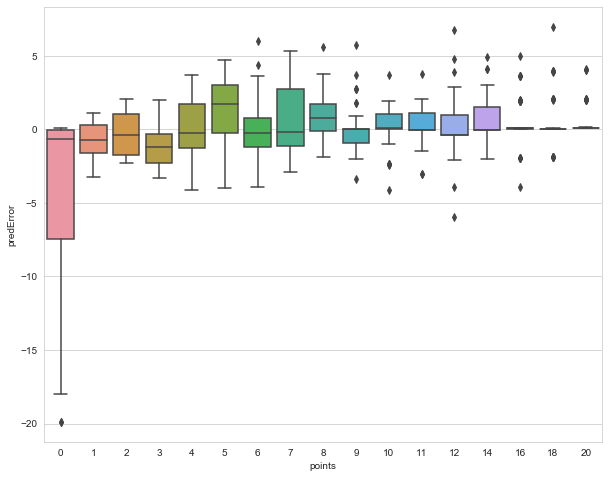

In [9]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "points", y = "predError", data = df2018)

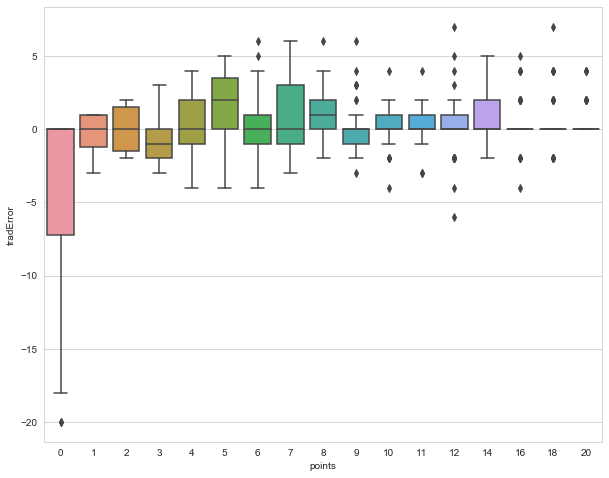

In [10]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "points", y = "tradError", data = df2018)

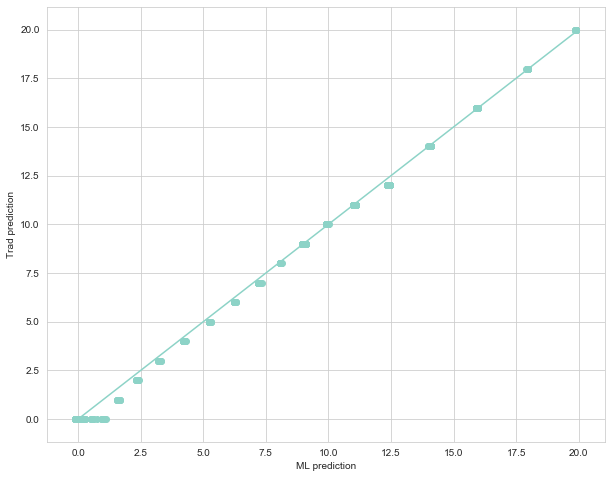

In [11]:
plt.figure(figsize = (10,8))
plt.xlabel("ML prediction")
plt.ylabel("Trad prediction")
lineX = np.linspace(0,20,20)
plt.plot(lineX, lineX)
plt.scatter(df2018["prediction"], df2018["tradPrediction"])


In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=250, criterion="mae", min_samples_leaf=32)
rfr = rfr.fit(trainX, trainY)
scores = cross_val_score(rfr, trainX, trainY, cv=4)
print(f"R^2: {scores.mean()} (+/- {scores.std() * 2})")

rfrY = rfr.predict(x2018)
rfrErrors = y2018 - rfrY
print("MAE:", rfrErrors.abs().mean())
df2018["rfrPred"] = rfrY
df2018["rfrError"] = rfrErrors

In [0]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "points", y = "rfrError", data = df2018)

In [0]:
plt.figure(figsize = (10,8))
plt.xlabel("Random Forest prediction")
plt.ylabel("Trad prediction")
lineX = np.linspace(0,20,20)
plt.plot(lineX, lineX)
plt.scatter(df2018["rfrPred"], df2018["tradPrediction"])

In [0]:
#["divsSpeed", "isRelay", "divsTimePctOfMean",  "clipped_divsRank"]
rfr.feature_importances_